<a href="https://colab.research.google.com/github/Brenton237/Data-Analysis-Exercise-with-Python/blob/main/Movie_Rating_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [59]:
cd MyDrive/

/gdrive/MyDrive


In [60]:
cd Data Analysis projects/

/gdrive/MyDrive/Data Analysis projects


In [61]:
cd Movie Analysis/

/gdrive/MyDrive/Data Analysis projects/Movie Analysis


#Movie Dataset Analysis Using Python

I'm going to introduce to you a Data science project on a movie data
### Questions To be answered
1. Which are the best movies to watch based on rating?
2. What is the network between actors and directors?
3. Which movies have the highest and least- budget, revenues, profits and runtime. And in which year we had most movies making profits?
4. What similar characteristics do the most profitable movies have?

The dataset I use for the data analytics task consist of information about 10k+ movies collected from TMDb.
The dataset is provided by [Kaggle](https://www.kaggle.com/datasets/juzershakir/tmdb-movies-dataset) which is a huge repository of community data.


I’ll start by importing the dataset and all the Python libraries needed for this task:

In [62]:
# Required modules
import pandas as pd
import numpy as np
# Plotting modules
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

### Note:
I just import the dataset because I have already downloaded it. 

In [63]:
df= pd.read_csv("tmdb_movies_data.csv")
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08


Let's change some of the column names for more clarity. 

In [64]:
dfa = df.rename(columns={'vote_count': 'rate_count', 'vote_average': 'average_rating'}).round()
dfa.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,rate_count,average_rating,release_year,budget_adj,revenue_adj
0,135397,tt0369610,33.0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.0,2015,137999939.0,1.392446e+09
1,76341,tt1392190,28.0,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.0,2015,137999939.0,3.481613e+08
2,262500,tt2908446,13.0,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.0,2015,101199956.0,2.716190e+08


Here we created a profit column

In [65]:
dfa["profit"] = dfa["revenue"] - dfa["budget"]
dfa.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,rate_count,average_rating,release_year,budget_adj,revenue_adj,profit
0,135397,tt0369610,33.0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.0,2015,137999939.0,1.392446e+09,1363528810
1,76341,tt1392190,28.0,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.0,2015,137999939.0,3.481613e+08,228436354
2,262500,tt2908446,13.0,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.0,2015,101199956.0,2.716190e+08,185238201
3,140607,tt2488496,11.0,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,8.0,2015,183999919.0,1.902723e+09,1868178225
4,168259,tt2820852,9.0,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.0,2015,174799923.0,1.385749e+09,1316249360


In [66]:
dfa["release_date"].min()

'1/1/1960'

In [67]:
dfa["release_date"].min()

'1/1/1960'

In [68]:
ratings = dfa["average_rating"].value_counts()
amount = ratings.values
num = ratings.index
pieChart = px.pie(df, values = amount, names = num,title='Distribution of Content Ratings',color_discrete_sequence = px.colors.qualitative.Set3)
pieChart.show()


In [69]:
dfb = dfa.query("average_rating == 9 ")
print(dfb["original_title"].value_counts().head(10))

The Mask You Live In                               1
Black Mirror: White Christmas                      1
Life Cycles                                        1
Opeth: In Live Concert At The Royal Albert Hall    1
The Story of Film: An Odyssey                      1
Pink Floyd: Pulse                                  1
Name: original_title, dtype: int64


Movie with highest budjet

In [70]:
bud_high = df["budget"].max()
print("highest budget:", bud_high)
bud_low = df["budget"].min()
print("least budget:", bud_low)

highest budget: 425000000
least budget: 0


Movie with Highest Budget

In [71]:
dfa.loc[dfa["budget"] == 425000000]["original_title"]

2244    The Warrior's Way
Name: original_title, dtype: object

Movie/Movies with Least Budgets

In [72]:
dfa.loc[dfa["budget"] == 0]["original_title"]

30                           Mr. Holmes
36                               Solace
72                     Beyond the Reach
74               Mythica: The Darkspore
75       Me and Earl and the Dying Girl
                      ...              
10860               Carry On Screaming!
10861                The Endless Summer
10862                        Grand Prix
10863               Beregis Avtomobilya
10864            What's Up, Tiger Lily?
Name: original_title, Length: 5696, dtype: object

In [73]:
rev_high = df["revenue"].max()
print("highest revenue:", rev_high)
rev_low = df["revenue"].min()
print("least revenue:", rev_low)

highest revenue: 2781505847
least revenue: 0


Movie with Highest Revenue

In [74]:
dfa.loc[dfa["revenue"] == 2781505847]["original_title"]

1386    Avatar
Name: original_title, dtype: object

Movie/Movies with the least Revenue

In [75]:
dfa.loc[dfa["revenue"] == 0]["original_title"]

48                            Wild Card
67                             Survivor
74               Mythica: The Darkspore
75       Me and Earl and the Dying Girl
92             Mythica: The Necromancer
                      ...              
10861                The Endless Summer
10862                        Grand Prix
10863               Beregis Avtomobilya
10864            What's Up, Tiger Lily?
10865          Manos: The Hands of Fate
Name: original_title, Length: 6016, dtype: object

In [76]:
bud_high = dfa["profit"].max()
print("highest profit:", bud_high)
bud_low = dfa["profit"].min()
print("least profit:", bud_low)

highest profit: 2544505847
least profit: -413912431


Movie with the highest profit

In [77]:
dfa.loc[dfa["profit"] ==2544505847]["original_title"]

1386    Avatar
Name: original_title, dtype: object

Movie with the least Profit

In [78]:
dfa.loc[dfa["profit"] ==-413912431]["original_title"]

2244    The Warrior's Way
Name: original_title, dtype: object

the Graph below shows distribution of profit margins within the years.
Hence,

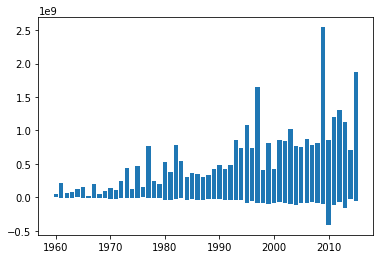

In [79]:
year =dfa["release_year"]
profit = dfa["profit"]
plt.bar(year, profit)
plt.show()

the year with the highest profit is

In [80]:
dfa.loc[dfa["profit"] ==2544505847]["release_year"]

1386    2009
Name: release_year, dtype: int64

# Top 5 Actors and Directors:
Now let's see the top 5 successful directors on this platform:

In [81]:
dfa['director'] = dfa['director'].fillna('No Director Specified')
filtered_directors = pd.DataFrame()
filtered_directors = dfa['director'].str.split(',',expand=True).stack()
filtered_directors = filtered_directors.to_frame()
filtered_directors.columns = ['Director']
directors=filtered_directors.groupby(['Director']).size().reset_index(name='Total Content')
directors=directors[directors.Director !='No Director Specified']
directors=directors.sort_values(by=['Total Content'],ascending=False)
directorsTop5=directors.head()
directorsTop5=directorsTop5.sort_values(by=['Total Content'])
fig1=px.bar(directorsTop5,x='Total Content',y='Director',title='Top 5 Directors')
fig1.show()

From the graph above the top 5 Directors are:


1.   Woody Allen
2.   Clint Eastwood
3.   Martin Scorsese
4.   Steven Spielberg
5.   Ridley Scott





In [82]:
dfa['cast'] = dfa['cast'].fillna('No Cast Specified')
filtered_cast = pd.DataFrame()
filtered_cast = dfa['cast'].str.split('|',expand = True).stack() 
filtered_cast = filtered_cast.to_frame() 
filtered_cast.columns = ['Actor']
actors = filtered_cast.groupby(['Actor']).size().reset_index(name = 'Total Content')
actors = actors[actors.Actor !='No Cast Specified']
actors = actors.sort_values(by = ['Total Content'],ascending = False)
actorsTop5 = actors.head()
actorsTop5 = actorsTop5.sort_values(by = ['Total Content'])
fig2 = px.bar(actorsTop5,x='Total Content',y = 'Actor', title = 'Top 5 Actors on Netflix')
fig2.show()


From the graph above the top 5 actors are:


1.   Robert De Niro
2.   Sameul L. Jackson
3.   Bruce Willis
4.   Nicolas Cage
5.   Micheal Caine



In [83]:
dfb = dfa[["budget","revenue","average_rating","profit"]]

We are now going to use correlations to understand the relationships between the variables above. Correlation is a statistical measure that tells us about the association between the two variables. There are two types of correlations namely: Pearson's and Spearman's Corrrelation.
We are first going to use the Pearson's correlation to understand the relationships between the variables.

First we begin with the Person's correlation.
### Pearson's Correlation:
In statistics, the Pearson correlation coefficient also referred to as Pearson’s r or the bivariate correlation is a statistic that measures the linear correlation between two variables X and Y. It has a value between +1 and −1. A value of +1 is a total positive linear correlation, 0 is no linear correlation, and −1 is a total negative linear correlation.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



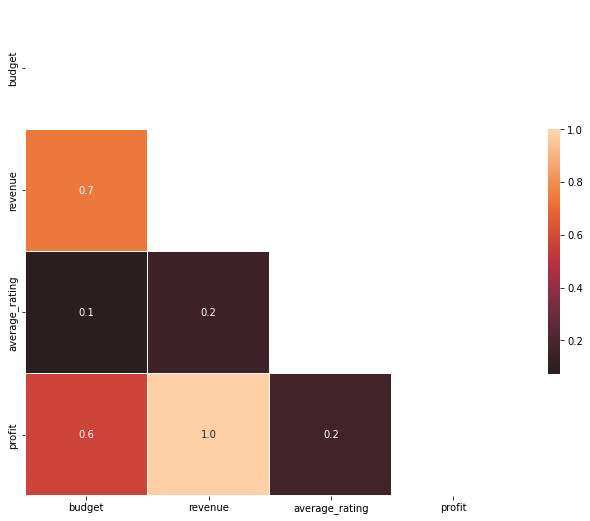

In [84]:
# Calculate the correlation matrix
corr = dfb.corr(method='pearson')

# Create a mask to hide the upper triangle of the correlation matrix (which is symmetric)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corr, mask=mask, vmax=1, center=0, annot=True, fmt='.1f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

Here we see that the most related variables are revenue-budget and the least are avearage_rating-buget, revenue-profit.
Note: All variables have a positive relationship.

Next we do the Spearman's Correlation
### Spearman's Correlation:
In statistics, Spearman’s rank correlation coefficient or Spearman’s ρ, named after Charles Spearman is a nonparametric measure of rank correlation (statistical dependence between the rankings of two variables). It assesses how well the relationship between two variables can be described using a monotonic function.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



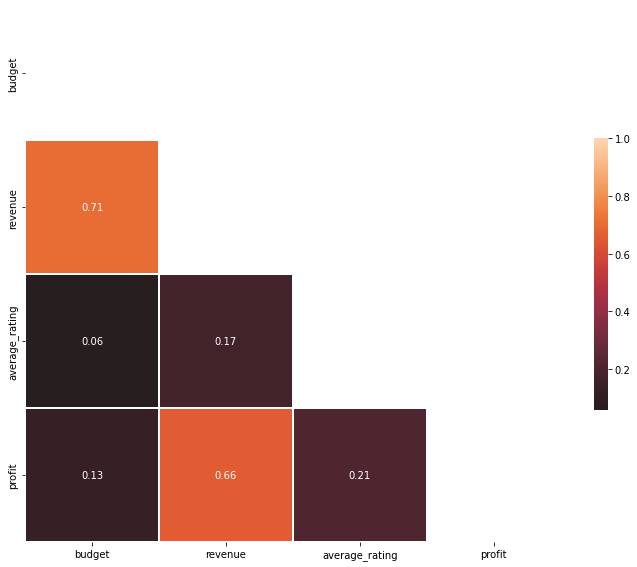

In [85]:
# Calculate the correlation matrix
corr = dfb.corr(method='spearman')

# Create a mask to hide the upper triangle of the correlation matrix (which is symmetric)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 10))

# Plot the heatmap using the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmax=1, center=0, annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

Here we see that the most related variables are revenue-budget, revenue-profit and the least are avearage_rating-buget, revenue-avearage
Note: All variables have a positive relationship.